# 1. Introduction

Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
The potential for creative feature engineering provides a rich opportunity for fun and learning. This dataset lends itself to advanced regression techniques like random forests and gradient boosting with the popular XGBoost library.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques


# 2. Data Loading & Preparation
## 2.1 Load up Python libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
from pandas.api.types import CategoricalDtype
import re
import warnings
import pprint
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import KFold
from IPython.display import HTML, display

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500


## 2.2 Read csv data and have a quick look

In [2]:
## load training data
house_train = pd.read_csv("data\\train.csv")
house_test = pd.read_csv("data\\test.csv")

print(f"Training shape: {house_train.shape}")
print(f"Testing shape: {house_test.shape}")

Training shape: (1460, 81)
Testing shape: (1459, 80)


In [3]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2.3 Data Types
Pandas guesses the types of all the columns when it scans a csv. It does a reasonable job most of the time, but we need to check carefully.

### 2.3.1 Build a categorical data reference

In [6]:
# Derive categorical features and all their possible categories from data_description.txt
categorical_lookup = {}
with open(".\\data\\data_description.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

    for line in lines:
        if (not re.search(r"^\s", line)) & (": " in line):
            # if line doesnt start with space/tab, and contains :, its a key
            col, _ = line.strip().split(":")
            categorical_lookup[col] = []
        else:
            # else if its longer than zero it's a value
            if len(line.strip()) > 0:
                val = line.strip().split("\t")[0].strip()
                categorical_lookup[col].append(val)
                
# Print some formatted results
categorical_lookup = {k:categorical_lookup[k] for k in list(categorical_lookup.keys()) if len(categorical_lookup[k]) > 0}
for key in categorical_lookup.keys():
    print(f"{key}: {categorical_lookup[key][:5]}")

MSSubClass: ['20', '30', '40', '45', '50']
MSZoning: ['A', 'C', 'FV', 'I', 'RH']
Street: ['Grvl', 'Pave']
Alley: ['Grvl', 'Pave', 'NA']
LotShape: ['Reg', 'IR1', 'IR2', 'IR3']
LandContour: ['Lvl', 'Bnk', 'HLS', 'Low']
Utilities: ['AllPub', 'NoSewr', 'NoSeWa', 'ELO']
LotConfig: ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
LandSlope: ['Gtl', 'Mod', 'Sev']
Neighborhood: ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr']
Condition1: ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn']
Condition2: ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn']
BldgType: ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']
HouseStyle: ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin']
OverallQual: ['10', '9', '8', '7', '6']
OverallCond: ['10', '9', '8', '7', '6']
RoofStyle: ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard']
RoofMatl: ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll']
Exterior1st: ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock']
Exterior2nd: ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock']
MasVnrT

Looks like thse contain ordinal and nominal variables as well some that could be converted to numerics (OverallQual, OverallCond).

In [7]:
# Check that the values in the category lookup match those in the data
def test_missing_categories():
    missing_categories = {}
    for col in categorical_lookup.keys():
        cat_diff = list(set(house_train[col].dropna().unique()) - set(categorical_lookup[col]))
        
        # level_diff = list(set([str(i) for i in house_train[varname] if str(i) != "nan"]) - set(categorical_lookup[varname]))
        if len(cat_diff) > 0:
            missing_categories[col] = cat_diff
    return(missing_categories)

pprint.pprint(test_missing_categories())

{'BldgType': ['2fmCon', 'Twnhs', 'Duplex'],
 'Exterior2nd': ['CmentBd', 'Wd Shng', 'Brk Cmn'],
 'MSSubClass': [160, 70, 40, 75, 45, 190, 80, 50, 20, 85, 180, 120, 90, 60, 30],
 'MSZoning': ['C (all)'],
 'Neighborhood': ['NAmes'],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 8, 9],
 'OverallQual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


Other columns contain values missing from the lookup (MSSubClass, MSZoning, Neighborhood, BldgType, Exterior2nd, SaleType).

We need to look at these individually to understand them.

### 2.3.2 Fixing Categories and names
Above we saw that certain of the values that occur in the data set, are missing from the categorical lookup, lets add them.

We can automate a lot of things, but some things need to be done manually, especially during EDA.

In [8]:
# small helper to replace values in the category lookup
def cat_val_replacer(colname, old, new):
    try:
        idx = categorical_lookup[colname].index(old)
        categorical_lookup[colname][idx] = new
    except:
        pass

In [9]:
# MSZoning
print(test_missing_categories()["MSZoning"])
# print(house_train["MSZoning"].unique())
# print(house_test["MSZoning"].unique())
print(categorical_lookup["MSZoning"])

['C (all)']
['A', 'C', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']


In [10]:
cat_val_replacer("MSZoning", 'C', 'C (all)')
print(categorical_lookup["MSZoning"])

['A', 'C (all)', 'FV', 'I', 'RH', 'RL', 'RP', 'RM']


In [11]:
# Neighborhood
print(test_missing_categories()["Neighborhood"])
# print(house_train["Neighborhood"].unique())
# print(house_test["Neighborhood"].unique())
print(categorical_lookup["Neighborhood"])

['NAmes']
['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [12]:
cat_val_replacer("Neighborhood", 'Names', 'NAmes')
print(categorical_lookup["Neighborhood"])

['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [13]:
# BldgType
print(test_missing_categories()["BldgType"])
# print(house_train["BldgType"].unique())
# print(house_test["BldgType"].unique())
print(categorical_lookup["BldgType"])

['2fmCon', 'Twnhs', 'Duplex']
['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI']


In [14]:
cat_val_replacer("BldgType", '2FmCon', '2fmCon')
cat_val_replacer("BldgType", 'Duplx', 'Duplex')
cat_val_replacer("BldgType", 'TwnhsI', 'Twnhs')
print(categorical_lookup["Neighborhood"])

['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NoRidge', 'NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker']


In [15]:
# Exterior2nd
print(test_missing_categories()["Exterior2nd"])
# print(house_train["Exterior2nd"].unique())
# print(house_test["Exterior2nd"].unique())
print(categorical_lookup["Exterior2nd"])

['CmentBd', 'Wd Shng', 'Brk Cmn']
['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'WdShing']


In [16]:
cat_val_replacer("Exterior2nd", 'WdShing', 'Wd Shng')
cat_val_replacer("Exterior2nd", 'CemntBd', 'CmentBd')
cat_val_replacer("Exterior2nd", 'BrkComm', 'Brk Cmn')
print(categorical_lookup["Exterior2nd"])

['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock', 'CmentBd', 'HdBoard', 'ImStucc', 'MetalSd', 'Other', 'Plywood', 'PreCast', 'Stone', 'Stucco', 'VinylSd', 'Wd Sdng', 'Wd Shng']


In [17]:
# MSSubClass
print(test_missing_categories()["MSSubClass"])
print(categorical_lookup["MSSubClass"])

[160, 70, 40, 75, 45, 190, 80, 50, 20, 85, 180, 120, 90, 60, 30]
['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190']


In [18]:
# MSSubClass needs to be converted to string - why not numeric?
house_train["MSSubClass"] = house_train["MSSubClass"].astype(str)

In [19]:
# Check again
test_missing_categories()

{'OverallQual': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'OverallCond': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

OverallCond and OverallQual look like they should be left as numerics since theyre numeric ordinal, with equal spacing, so drop them from the category lookup

In [20]:
del categorical_lookup["OverallCond"]
del categorical_lookup["OverallQual"]

In [21]:
test_missing_categories()

{}

A couple of last things

In [22]:
# Convert the bool column to 1/0
house_train["CentralAir"] = house_train["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)
house_test["CentralAir"] = house_test["CentralAir"].apply(lambda x: 1 if x == "Y" else 0)
del categorical_lookup["CentralAir"]
house_train["CentralAir"]

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int64

In [ ]:
# # Drop the Id column, we will use row index
# house_train = house_train.drop(columns=["Id"])
# house_test = house_test.drop(columns=["Id"])

## 2.4 Split categorical into ordinal & nominal

In [23]:
# Take another look at our categoricals...
for key in categorical_lookup.keys():
    print(f"{key}: {categorical_lookup[key][:5]}")

MSSubClass: ['20', '30', '40', '45', '50']
MSZoning: ['A', 'C (all)', 'FV', 'I', 'RH']
Street: ['Grvl', 'Pave']
Alley: ['Grvl', 'Pave', 'NA']
LotShape: ['Reg', 'IR1', 'IR2', 'IR3']
LandContour: ['Lvl', 'Bnk', 'HLS', 'Low']
Utilities: ['AllPub', 'NoSewr', 'NoSeWa', 'ELO']
LotConfig: ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
LandSlope: ['Gtl', 'Mod', 'Sev']
Neighborhood: ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr']
Condition1: ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn']
Condition2: ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn']
BldgType: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle: ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin']
RoofStyle: ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard']
RoofMatl: ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll']
Exterior1st: ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock']
Exterior2nd: ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock']
MasVnrType: ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone']
ExterQual: ['Ex', 'G

Looking through these, it looks like ordinas would be the following variables, with their categories ordered as follows. These sorts of things you need to do manually...

In [31]:
# manual build ordinal lookup
ordinal_lu = {
    "LotShape": ['Reg', 'IR1', 'IR2', 'IR3'],
    "Utilities": ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'],
    "LandSlope": ['Gtl', 'Mod', 'Sev'],
    "ExterQual": ['Po','Fa', 'TA', 'Gd', 'Ex'],
    "ExterCond": ['Po','Fa', 'TA', 'Gd', 'Ex'],
    "BsmtQual": ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtCond": ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "BsmtExposure": ['NA', 'No', 'Mn', 'Av', 'Gd'],
    "BsmtFinType1": ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "BsmtFinType2": ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    "HeatingQC": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "KitchenQual": ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "Functional": ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    "FireplaceQu": ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageFinish": ['NA', 'Unf', 'RFn', 'Fin'],
    "GarageQual": ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "GarageCond": ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
    "PavedDrive": ['N', 'P', 'Y'],
    "PoolQC": ['NA', 'Fa', 'TA', 'Gd', 'Ex']
}

non_nom = list(ordinal_lu.keys())
nominal_lu = {k: categorical_lookup[k] for k in categorical_lookup if k not in non_nom}

non_num = list(ordinal_lu.keys()) + list(nominal_lu.keys()) + ["Id"]
numerics = [c for c in house_train.columns if c not in non_num]

print("nominals")
for key in nominal_lu.keys():
    print(f"{key}: {nominal_lu[key][:5]}")

print("\nordinals")
for key in ordinal_lu.keys():
    print(f"{key}: {ordinal_lu[key][:5]}")

print("\nnumerics")
print(numerics)

nominals
MSSubClass: ['20', '30', '40', '45', '50']
MSZoning: ['A', 'C (all)', 'FV', 'I', 'RH']
Street: ['Grvl', 'Pave']
Alley: ['Grvl', 'Pave', 'NA']
LandContour: ['Lvl', 'Bnk', 'HLS', 'Low']
LotConfig: ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']
Neighborhood: ['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr']
Condition1: ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn']
Condition2: ['Artery', 'Feedr', 'Norm', 'RRNn', 'RRAn']
BldgType: ['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle: ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin']
RoofStyle: ['Flat', 'Gable', 'Gambrel', 'Hip', 'Mansard']
RoofMatl: ['ClyTile', 'CompShg', 'Membran', 'Metal', 'Roll']
Exterior1st: ['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock']
Exterior2nd: ['AsbShng', 'AsphShn', 'Brk Cmn', 'BrkFace', 'CBlock']
MasVnrType: ['BrkCmn', 'BrkFace', 'CBlock', 'None', 'Stone']
Foundation: ['BrkTil', 'CBlock', 'PConc', 'Slab', 'Stone']
Heating: ['Floor', 'GasA', 'GasW', 'Grav', 'OthW']
Electrical: ['SBrkr', 

## 2.5 Converting column data types
convert the data types:
- Categorical to ordinal, nominal or boolean
- Make sure the rest are numeric

In [32]:
def column_typer(pdf:pd.DataFrame):
    for colname in pdf.columns:
        if colname in ordinal_lu.keys():
            cat_def = CategoricalDtype(categories=ordinal_lu[colname], ordered=True)
            pdf[colname] = pdf[colname].astype(str).astype(cat_def)

        elif colname in nominal_lu.keys():
            cat_def = CategoricalDtype(categories=nominal_lu[colname], ordered=False)
            pdf[colname] = pdf[colname].astype(str).astype(cat_def)

        else:
            pdf[colname] = pd.to_numeric(pdf[colname])

    return(pdf)

house_train = column_typer(house_train.copy())
house_test = column_typer(house_test.copy())

## 2.6 Saving data
Its a good idea to save your data from time to time, so that you can more easily pick up where you left off

In [33]:
house_train.to_pickle("house_train_tidy.pkl")
house_test.to_pickle("house_test_tidy.pkl")

In [34]:
house_train = pd.read_pickle("house_train_tidy.pkl")
house_test = pd.read_pickle("house_test_tidy.pkl")

# 3. Visualizations
## 3.1 SalePrice
### 3.1.1 Q-Q Plot
Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512989))

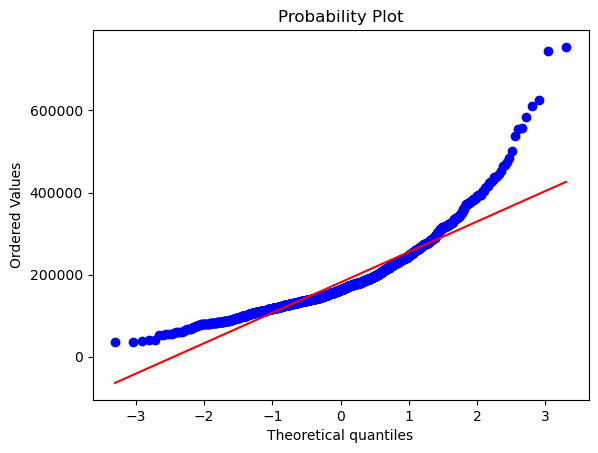

In [35]:
stats.probplot(house_train['SalePrice'], dist='norm', plot=plt)

### 3.1.2 Histograms

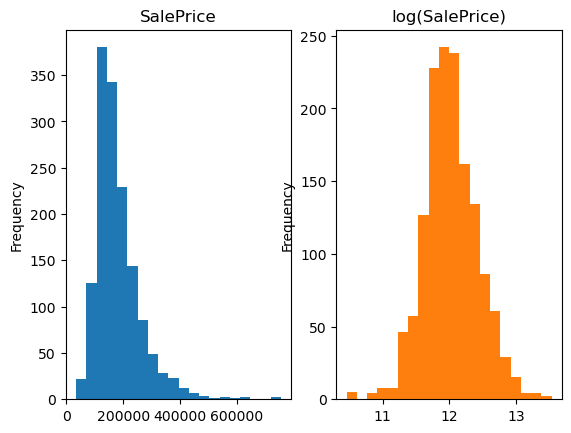

In [36]:
# Take a look at the distribution of the target variable
fig,ax = plt.subplots(1,2, sharex=False)
house_train["SalePrice"].plot(kind="hist", ax=ax[0], color='tab:blue', title="SalePrice", bins=20)
np.log(house_train["SalePrice"]).plot(kind="hist", ax=ax[1], color='tab:orange', title="log(SalePrice)", bins=20);

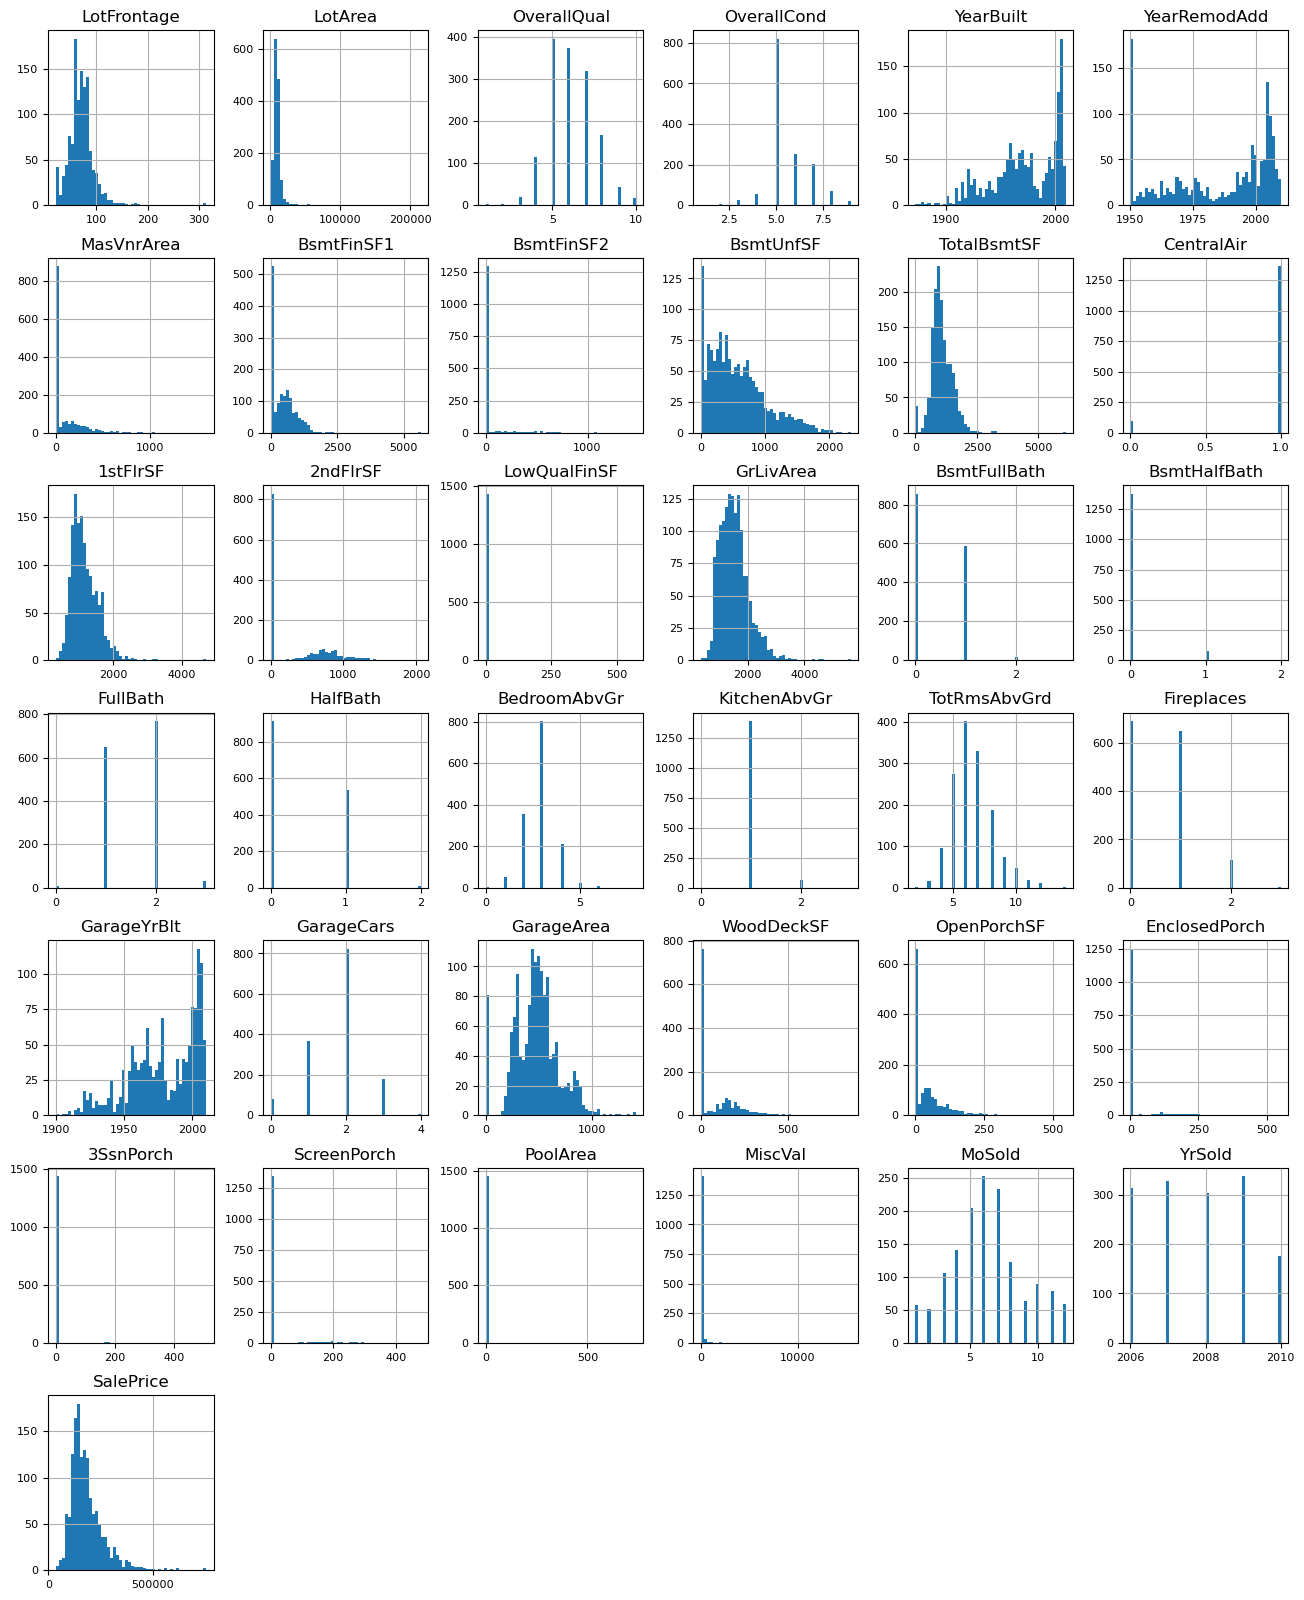

In [37]:
# Look at distributions of all numeric data
house_train[numerics].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## 3.2 Understand features in terms of SalePrice

In [ ]:
def facet_plotter(pdf:pd.DataFrame, x_vars:list, y_var:str, col_wrap:int=4):
    g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=col_wrap, sharex=False)
    for ax, x_var in zip(g.axes, x_vars):
        sns.boxplot(data=pdf, x=x_var, y=y_var, ax=ax)
    g.tight_layout()

In [ ]:
# Look at Ordinals in terms of sames price
facet_plotter(house_train, ordinal_lu.keys(), "SalePrice")

In [ ]:
# Nominals
facet_plotter(house_train, nominal_lu.keys(), "SalePrice")

In [ ]:
# Numeric variables
f = pd.melt(house_train, id_vars=['SalePrice'], value_vars=numerics)
sns.lmplot(
    data=f, x="value", y='SalePrice', col="variable", lowess=True, 
    col_wrap=4, height=3, aspect=1,scatter_kws={'alpha':0.3, "linewidth":0}, line_kws={"color": "C1"}, facet_kws={"sharex": False})

## 3.3 Correlations
### 3.3.1 Correlations between Continuous Variables

In [ ]:
corrmat = house_train[numerics].corr(method='spearman')
plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, annot=False, cmap="YlGnBu", square=True)

### 3.3.2 Correlations between Ordinal Variables

In [ ]:
# Create a temporary datframe containing the ordinal order values
pdf_tmp = house_train[ordinal_lu.keys()].copy()
for c in ordinal_lu.keys():
    pdf_tmp[c] = pdf_tmp[c].cat.codes
corrmat = pdf_tmp.corr(method='kendall')
plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, annot=False, cmap="YlGnBu", square=True)
# sns.clustermap(corrmat, vmax=.8, square=True, cmap="vlag_r", method = "complete")

## 3.4 Correlations with SalePrice
### 3.4.1 Ordinals with SalePrice

In [ ]:
# function to calculate correlations between features and SalePrice
def spearman_categoricals(pdf, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [pdf[f].cat.codes.corr(pdf['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
spearman_categoricals(house_train, ordinal_lu.keys())

### 3.4.2 Numerics with SalePrice

In [ ]:
# function to calculate correlations between features and SalePrice
def spearman_numerics(pdf, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [pdf[f].corr(pdf['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
spearman_numerics(house_train, numerics)

# 4. Missingness
## 4.1 Understanding missingness

In [38]:
house_train = pd.read_pickle("house_train_tidy.pkl")
house_test = pd.read_pickle("house_test_tidy.pkl")

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74


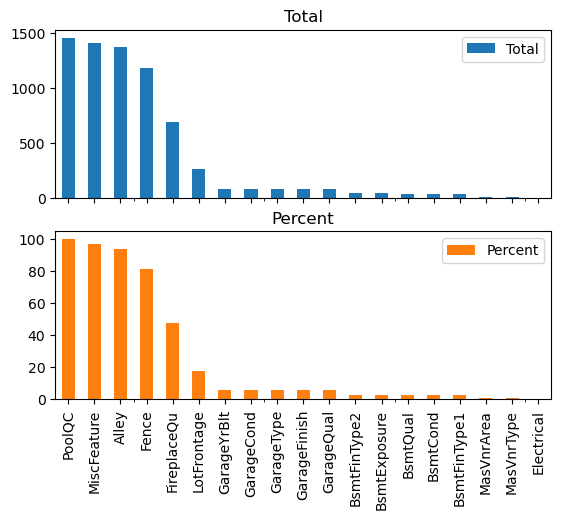

In [39]:
def missing_plotter(pdf):
    total = pdf.isnull().sum().sort_values(ascending=False)
    percent = (pdf.isnull().sum()/pdf.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, round(percent*100,2)], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total>=1]
    if len(missing_data) > 0:
        missing_data.plot.bar(subplots=True); # Pandas
    else:
        print("No missing data")
    return(missing_data)
missing_plotter(house_train)[:6]

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56


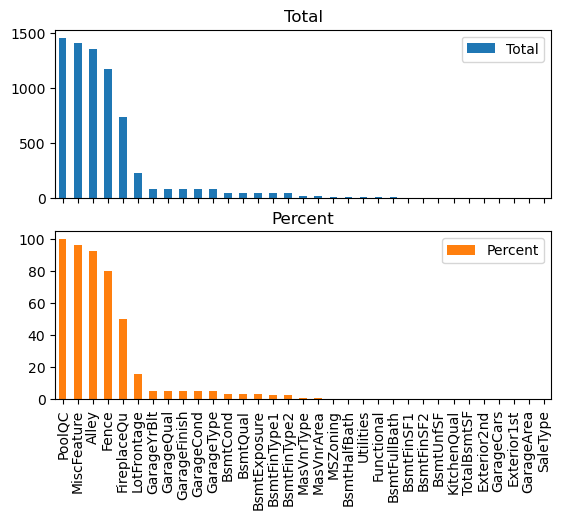

In [40]:
missing_plotter(house_test)[:6]

Looks like 5 features have ~50% or more missing, rest are pretty low

## 4.2 Deal with some missing data
### 4.2.1 PoolQC

PoolQC
NA    0
Fa    2
TA    0
Gd    3
Ex    2
dtype: int64


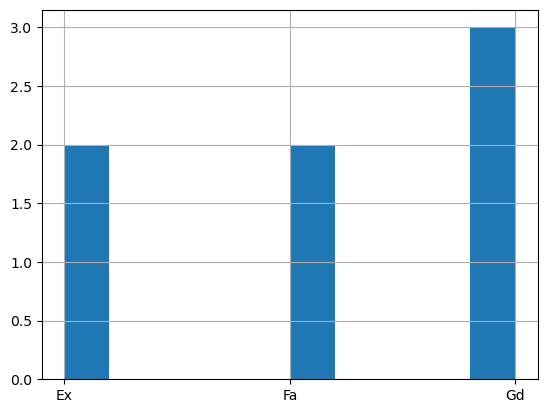

In [41]:
print(house_train.groupby("PoolQC").size())
house_train["PoolQC"].hist();

In [42]:
# Likely that missing values here are houses without pools
house_train["PoolQC"] = house_train["PoolQC"].fillna("NA")
house_test["PoolQC"] = house_test["PoolQC"].fillna("NA")

### 4.2.2 MiscFeature

MiscFeature
Elev     0
Gar2     2
Othr     2
Shed    49
TenC     1
NA       0
dtype: int64


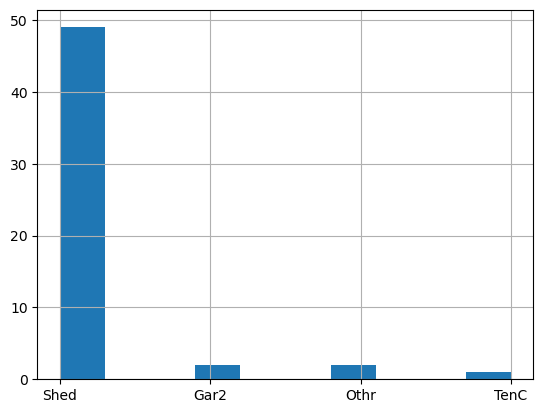

In [43]:
print(house_train.groupby("MiscFeature").size())
house_train["MiscFeature"].hist();

In [44]:
# Likely that missing values here are houses without miscelaneous features
house_train["MiscFeature"] = house_train["MiscFeature"].fillna("NA")
house_test["MiscFeature"] = house_test["MiscFeature"].fillna("NA")

### 4.2.3 Alley

Alley
Grvl    50
Pave    41
NA       0
dtype: int64


<Axes: >

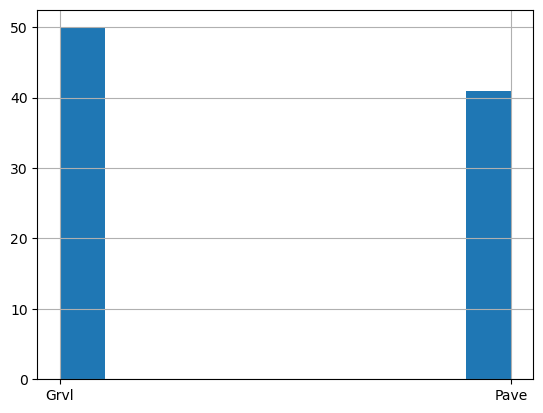

In [45]:
print(house_train.groupby("Alley").size())
house_train["Alley"].hist()

In [46]:
# Likely that missing values here are houses without Alley access
house_train["Alley"] = house_train["Alley"].fillna("NA")
house_test["Alley"] = house_test["Alley"].fillna("NA")

### 4.2.4 Fence

Fence
GdPrv     59
MnPrv    157
GdWo      54
MnWw      11
NA         0
dtype: int64


<Axes: >

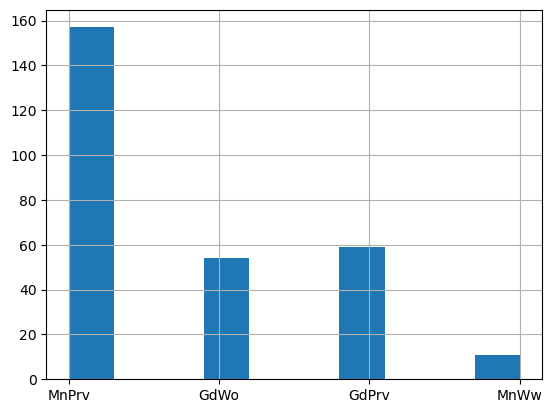

In [47]:
print(house_train.groupby("Fence").size())
house_train["Fence"].hist()

In [48]:
# Likely that missing values here are houses without Alley access
house_train["Fence"] = house_train["Fence"].fillna("NA")
house_test["Fence"] = house_test["Fence"].fillna("NA")

### 4.2.5 FireplaceQu

FireplaceQu
NA      0
Po     20
Fa     33
TA    313
Gd    380
Ex     24
dtype: int64


<Axes: >

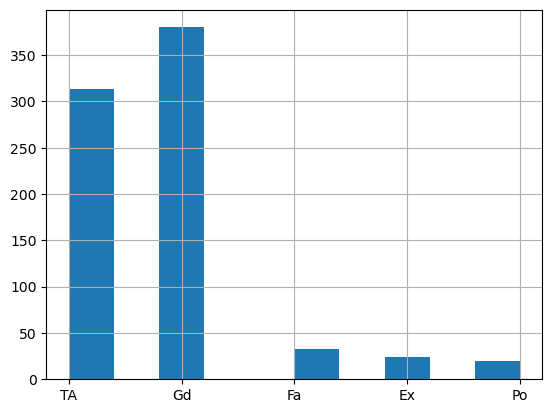

In [49]:
print(house_train.groupby("FireplaceQu").size())
house_train["FireplaceQu"].hist()

In [50]:
# Likely that missing values here are houses without Alley access
house_train["FireplaceQu"] = house_train["FireplaceQu"].fillna("NA")
house_test["FireplaceQu"] = house_test["FireplaceQu"].fillna("NA")

,Total,Percent
LotFrontage,259,17.74
GarageFinish,81,5.55
GarageCond,81,5.55
GarageYrBlt,81,5.55
GarageQual,81,5.55


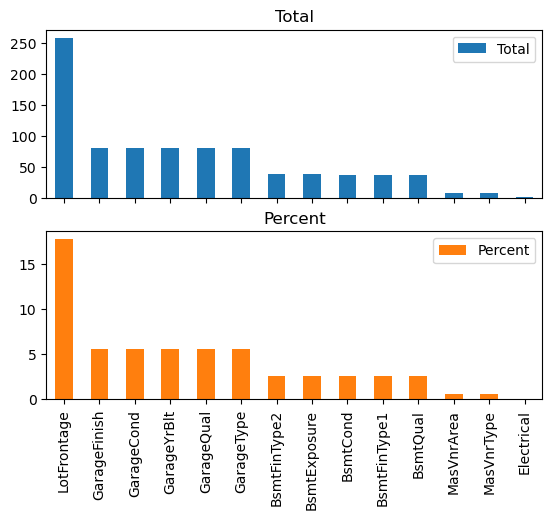

In [51]:
# Look at missing again
missing_plotter(house_train)[:5]

,Total,Percent
LotFrontage,227,15.56
GarageFinish,78,5.35
GarageQual,78,5.35
GarageCond,78,5.35
GarageYrBlt,78,5.35


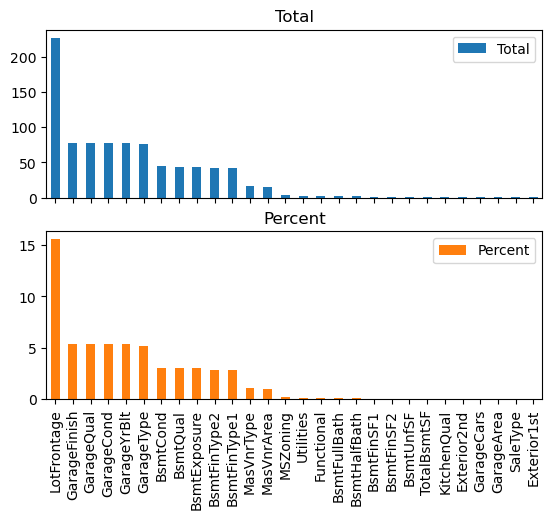

In [52]:

missing_plotter(house_test)[:5]

## 4.3 Missing Pattern of GarageYrBlt

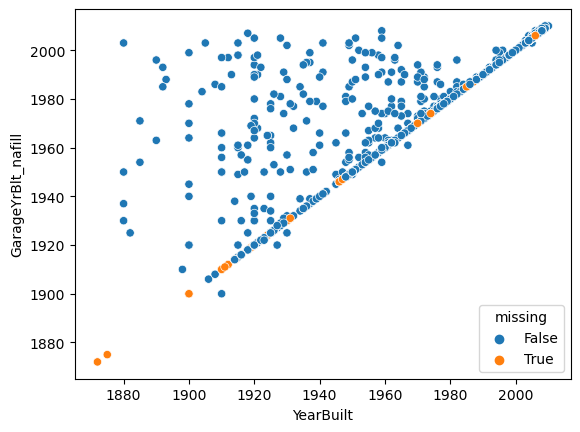

In [53]:
# How does GarageYrBlt relate to YearBuilt?
plt_data = house_train[["YearBuilt", "GarageYrBlt"]].copy()
plt_data["GarageYrBlt_nafill"] = plt_data["GarageYrBlt"].fillna(plt_data["YearBuilt"])
plt_data["missing"] = plt_data["GarageYrBlt"].apply(lambda x: True if pd.isnull(x) else False)

sns.scatterplot(data=plt_data, x="YearBuilt", y="GarageYrBlt_nafill", hue="missing");
# Looks like, in most cases, garages are built when the houses are built

### 4.3.1 Imputing GarageYrBlt
What does missing data here mean? likely that there is no garage... 

GarageBlt - years after construction that the garage was built. 0 indicates same year OR null
hasGarage - indicates whether there is a garage or not

In [54]:
## Create new feature: hasGarage
## Impute GarageYrBlt with YearBuilt

def garage_feat(pdf:pd.DataFrame) -> pd.DataFrame:
    pdf["hasGarage"] = [0 if pd.isnull(x) else 1 for x in pdf["GarageYrBlt"]]

    pdf["GarageBlt"] = pdf["GarageYrBlt"] - pdf["YearBuilt"]
    pdf.loc[pdf["GarageYrBlt"].isna(), "GarageBlt"] = 0
    pdf = pdf.drop(columns=["GarageYrBlt"])
    return(pdf)

house_train = garage_feat(house_train)
house_test = garage_feat(house_test.copy())


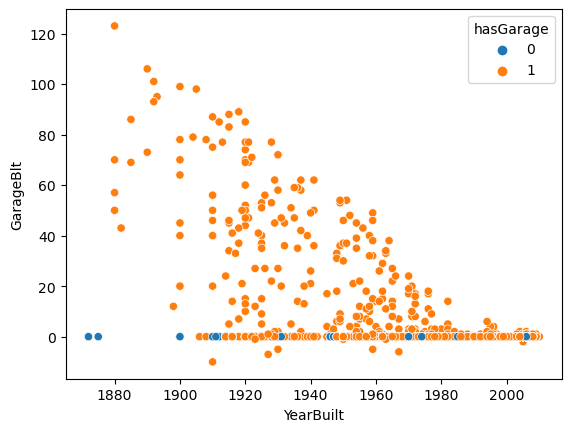

In [55]:
sns.scatterplot(data=house_train, x="YearBuilt", y="GarageBlt", hue="hasGarage");

### 4.3.2 update feature sets

In [56]:
# ordinal_lu.keys()
# nominal_lu.keys()
# bool_lu.keys()
# numerics

numerics = [i for i in numerics if i != "GarageYrBlt"]
numerics.append("GarageBlt")
numerics.append("hasGarage")

## 4.4 Transforming YearRemodAdd
- Remodel date (same as construction date if no remodeling or additions)

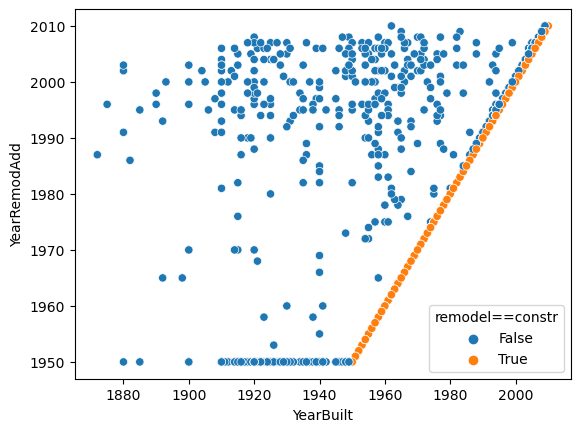

In [57]:
plt_data = house_train[["YearBuilt", "YearRemodAdd"]].copy()
plt_data["remodel==constr"] = plt_data["YearRemodAdd"]==plt_data["YearBuilt"]
plt_data["remodel==constr"]

sns.scatterplot(data=plt_data, x="YearBuilt", y="YearRemodAdd", hue="remodel==constr");

### 4.4.1 Create new features from YearRemodAdd

In [58]:
def remod_feat(pdf:pd.DataFrame) -> pd.DataFrame:
    pdf["isRemod"] = (pdf["YearRemodAdd"]==pdf["YearBuilt"]).astype(int)

    pdf["RemodAdd"] = pdf["YearRemodAdd"] - pdf["YearBuilt"]
    pdf = pdf.drop(columns=["YearRemodAdd"])
    return(pdf)

house_train = remod_feat(house_train)
house_test = remod_feat(house_test)

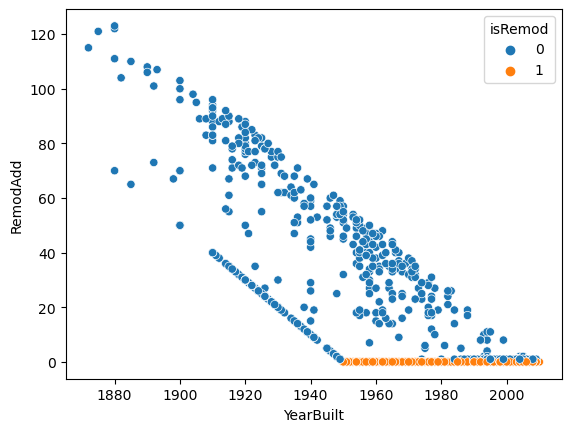

In [59]:
sns.scatterplot(data=house_train, x="YearBuilt", y="RemodAdd", hue="isRemod");

### 4.4.2 Update feature sets

In [60]:
# ordinal_lu.keys()
# nominal_lu.keys()
# bool_lu.keys()
# numerics

numerics = [i for i in numerics if i != "YearRemodAdd"]
numerics.append("RemodAdd")
numerics.append("isRemod")

## 4.5 Low Variance Predictors

In [61]:
def nearZeroVar(pdf, features, freqCut=95/5, uniqueCut=10):
    features = list(features)

    n_unique = []
    freqRatio = []
    percentUnique = []
    for f in features:
        tmp = pdf.groupby(f).size()
        tmp = tmp[tmp>0].sort_values(ascending=False).reset_index(drop=True)
        n_unique.append(len(tmp))
        freqRatio.append(tmp[0]/tmp[1])
        percentUnique.append((len(tmp)/len(pdf[f]))*100)

    res = pd.DataFrame()
    res['feature'] = features
    res['freqRatio'] = freqRatio
    res['percentUnique'] = percentUnique

    res["zeroVar"] = [True if i == 1 else False for i in n_unique]
    res["nzv"] = (res['freqRatio'] > freqCut) & (res['percentUnique'] < uniqueCut)

    return(res)

In [62]:
nzv = nearZeroVar(house_train, house_train.columns, freqCut=99/1, uniqueCut=5)
nzv = nzv[nzv["nzv"]]
nzv

,feature,freqRatio,percentUnique,zeroVar,nzv
5,Street,242.333333,0.136986,False,True
9,Utilities,1459.000000,0.136986,False,True
14,Condition2,240.833333,0.547945,False,True
21,RoofMatl,130.363636,0.547945,False,True
44,LowQualFinSF,478.000000,1.643836,False,True
67,3SsnPorch,478.666667,1.369863,False,True
69,PoolArea,1453.000000,0.547945,False,True
70,PoolQC,484.333333,0.273973,False,True
73,MiscVal,128.000000,1.438356,False,True


In [63]:
# Drop these
house_train = house_train.drop(columns=nzv["feature"])

## 4.6 Imputing other missing data using KNN and Mode

In [64]:
from sklearn.impute import KNNImputer, SimpleImputer

# KNN imputer for numeric values
imputer_num = KNNImputer(n_neighbors=5)

# Simple mode imputer for categoricals
# imputer_cat = SimpleImputer(strategy="most_frequent") # dont use as it drops catagorical info, roll your own
def mode_imputer(pdf):
    modes = pdf.mode().T
    for f in pdf.columns:
        pdf[f] = pdf[f].fillna(modes.loc[f][0])
    return(pdf)


In [65]:
def imputer(pdf:pd.DataFrame):
    # Columns have changed since we first identified all the types, so re-ID numeric vs categorical features
    numeric_cols = pdf.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = [c for c in pdf.columns if c not in numeric_cols]

    # Impute missing values separately
    pdf_num_imputed = pd.DataFrame(imputer_num.fit_transform(pdf[numeric_cols]), columns=numeric_cols)
    pdf_cat_imputed = mode_imputer(pdf[categorical_cols].copy())

    # Join the imputed versions back together
    pdf_concat = pd.concat([pdf_num_imputed, pdf_cat_imputed], axis=1)
    return(pdf_concat)

In [66]:
house_train = imputer(house_train)
house_test = imputer(house_test)

In [67]:
# Look at missing again
# Look at missing again
missing_plotter(house_train)[:5]

No missing data


,Total,Percent


## 4.7 Transforming SalePrice to log scale
Transforms can sometimes help models converge

In [69]:
house_train["logSalePrice"] = np.log(house_train['SalePrice'])

## 4.8 Save data

In [70]:
house_train.to_pickle("house_train_preproc.pkl")
house_test.to_pickle("house_test_preproc.pkl")

In [83]:
house_train = pd.read_pickle("house_train_preproc.pkl")
house_test = pd.read_pickle("house_test_preproc.pkl")

# 5. Model Training and Parameter Tuning
We will use Microsofts LightGBM framework to build a regression tree model for our data, and then see if we can improve performance via some hyper parameter tuning.
## 5.1 prepare the dataset for modelling

In [84]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Quieten some LGBM warnings
warnings.filterwarnings("ignore", category=UserWarning)

# ID features and target variables
features = [c for c in house_train.columns if c not in ["Id", "SalePrice", "logSalePrice"]]
target1 = "SalePrice"
target2 = "logSalePrice"

# split into train and validation sets
X, y = house_train[features], house_train[target1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


## 5.2 Train a vanilla model to set a baseline

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 11304.7	valid_1's rmse: 26270.5
Root Mean Squared Error: 26270.467236027256
MAE: 15781.589341450335


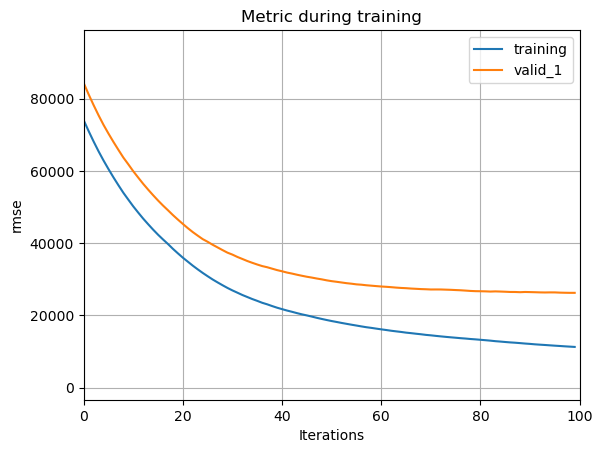

In [85]:
# LGBM api
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'poisson',
    'metric': 'rmse',
    'verbose': -1
}

# train your first model
evals={}
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=[lgb_train, lgb_valid],
                 callbacks = [lgb.record_evaluation(evals), lgb.log_evaluation(0), lgb.early_stopping(100)])

lgb.plot_metric(evals);

y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_valid, y_pred)
print('MAE:', mae)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 11304.7	valid_1's rmse: 26270.5
Root Mean Squared Error: 26270.467236027256
MAE: 15781.589341450335


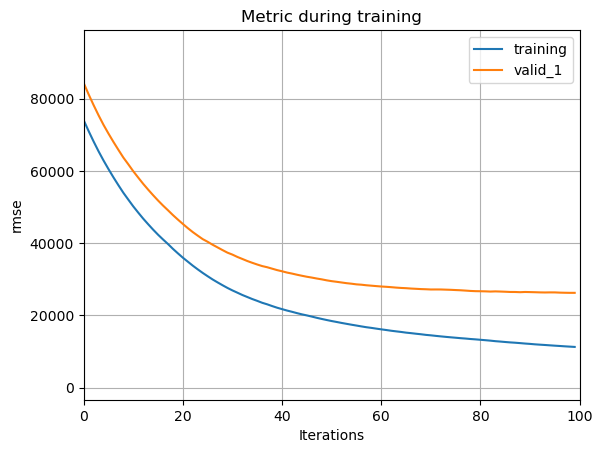

In [86]:
# SKLearn API
params = { 
    'boosting': 'gbdt',
    'objective': 'poisson',
    'metric': 'rmse',
    'verbose': -1
}

evals={}
model = lgb.LGBMRegressor(**params)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=-1,
    callbacks=[
        lgb.record_evaluation(evals), 
        lgb.early_stopping(100),
        lgb.log_evaluation(0)
    ], 
)

lgb.plot_metric(evals);

y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_valid, y_pred)
print('MAE:', mae)

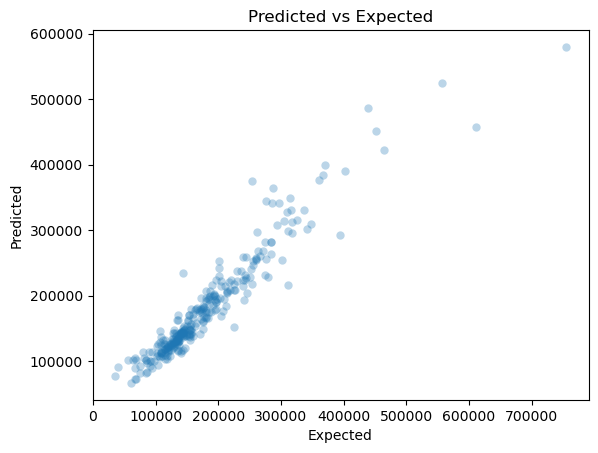

In [87]:
import matplotlib.pyplot as plt

plt.scatter(y_valid, y_pred, alpha=.3, linewidth=0)
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Predicted vs Expected")
plt.show()

## 5.3 Feature importance
Lets find out whether we can perhaps ignore some of our features, building simpler better models

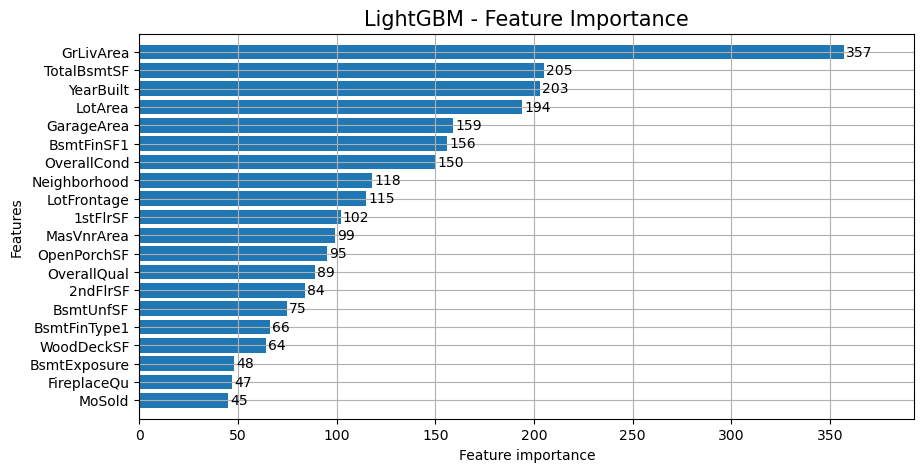

In [92]:
fig, ax = plt.subplots(figsize=(10,5))
lgb.plot_importance(model, max_num_features=20, height=0.8, ax=ax)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

In [93]:
feature_imp = pd.DataFrame({'importance':model.feature_importances_,'feature':X.columns})\
    .sort_values("importance", ascending=False)
feature_imp = feature_imp[feature_imp["importance"] > 0]\
    .reset_index(drop=True)
tot = feature_imp["importance"].sum()
feature_imp["perc"] = (feature_imp["importance"]/tot)*100
feature_imp["perc_cum"] = feature_imp["perc"].cumsum()
feature_imp.head()
# feature_imp.tail()

,importance,feature,perc,perc_cum
0,357,GrLivArea,11.900000,11.900000
1,205,TotalBsmtSF,6.833333,18.733333
2,203,YearBuilt,6.766667,25.500000
3,194,LotArea,6.466667,31.966667
4,159,GarageArea,5.300000,37.266667


### 5.3.1 Test model performance with fewer metrics
Lets get a general idea what happens if we drop some less important features... This can be useful when you have many thousands of features, and need a simpler faster model.

Generally it's at the expense of some score-performance, but that is ok sometimes.

In [94]:
def model_feat_test(feature_imp, cutoff):
    # ID features and target variables
    features = list(feature_imp.loc[feature_imp["perc_cum"]<=cutoff]["feature"])
    target1 = "SalePrice"

    # split into train and validation sets
    X, y = house_train[features], house_train[target1]
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

    # SKLearn API
    params = { 
        'boosting': 'gbdt',
        'objective': 'poisson',
        'metric': 'rmse',
        'verbose': -1
    }

    model = lgb.LGBMRegressor(**params)    
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_valid, y_valid)],
        verbose=-1,
        callbacks=[
            lgb.early_stopping(100),
            lgb.log_evaluation(0)
        ], 
    )

    y_pred = model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    return(cutoff, rmse)

cutoffs = [85, 90, 95, 100]
results = []
for cutoff in cutoffs:
    results.append(model_feat_test(feature_imp, cutoff))

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 11977.5	valid_1's rmse: 27157.2
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 11903.7	valid_1's rmse: 27666.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's rmse: 11742.4	valid_1's rmse: 27031.3
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Did not mee

In [95]:
print(results)

[(85, 27157.1906146657), (90, 27666.860455266666), (95, 27031.29054351567), (100, 26268.70564453969)]


Trimming off features which contribute to our model has an impact on score as expected, but trimming off zero contributing features actually improved the score a bit, so lets do that.

prev best: 26270.467236027256

new best: 26268.70564453969

### 5.3.2 Retain only contributing features

In [96]:
features = list(feature_imp["feature"])
target1 = "SalePrice"
target2 = "logSalePrice"

# split into train and validation sets
X, y = house_train[features], house_train[target1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.4 Hyperparameter tuning and Cross validation
Hyperparameter tuning: testing various combinations of model parameters, looking for optima

Cross validation: measuring model parameter performance across subsets of your data to measure performance and importantly stability

In [97]:
import optuna  # managing hyperparameter tuning/grid search
from sklearn.model_selection import KFold

### 5.4.1 Use Optuna to manage out hyperparameter tuning

In [98]:
# Build OpTunas objective function
def objective(trial, X, y):
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    #static parameters
    param_static = { 
        'boosting_type': 'gbdt',
        'objective': 'poisson',
        'metric': 'rmse',
        'verbose': -1,
    }
    
    # the parameter grid from where unique parameters will be drawn
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 60, step=1),
        "max_depth": trial.suggest_int("max_depth", 3, 50)
    }

    # set up cross validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # for storing scores from the K-Folds
    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMRegressor(
            **param_static, 
            **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric="rmse",
        categorical_feature="auto",
            verbose=-1,
            callbacks=[
                lgb.early_stopping(100, verbose=0),
                lgb.log_evaluation(0)
            ]
        )
        y_pred = model.predict(X_test)
        cv_scores[idx] = mean_squared_error(y_test, y_pred, squared=False)

    return np.mean(cv_scores)
    # return(0)

Run the grid search

In [99]:
# Suppress optuna training logs
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Create an OpTuna study
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")

# Call the Optuna Objective function, and begine some simple hyperparameter tuning
func = lambda trial: objective(trial, X, y)
study.optimize(func, n_trials=20, show_progress_bar=True)

  0%|          | 0/20 [00:00<?, ?it/s]

In [100]:
print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (rmse): 26339.44905
	Best params:
		n_estimators: 10000
		learning_rate: 0.18265719669687375
		num_leaves: 27
		max_depth: 34


In [101]:
optuna.visualization.plot_slice(study)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[82]	training's rmse: 8869.77	valid_1's rmse: 25653.6
Root Mean Squared Error: 25653.59680440085
MAE: 15622.797798425674


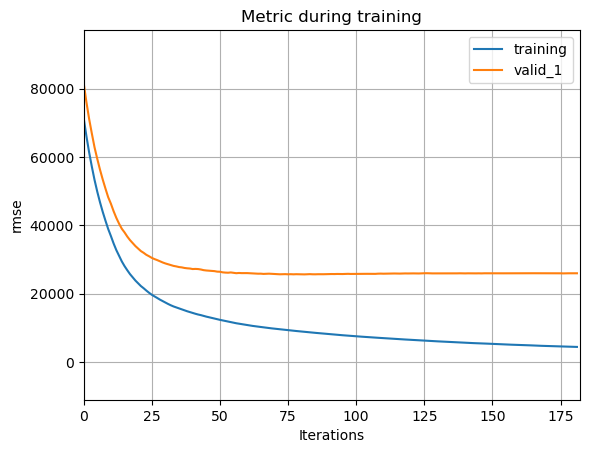

In [102]:
params = { 
    'boosting': 'gbdt',
    'objective': 'poisson',
    'metric': 'rmse',
    'verbose': -1
}

evals={}
model = lgb.LGBMRegressor(**params, **study.best_params)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=-1,
    callbacks=[
        lgb.record_evaluation(evals), 
        lgb.early_stopping(100),
        lgb.log_evaluation(0)
    ], 
)

lgb.plot_metric(evals);

y_pred = model.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_valid, y_pred)
print('MAE:', mae)

Some quick hyperparameter tuning has improves out RMSE score on the validation set.

prev best: 26268.70564453969

new best: 25653.59680440085